In [1]:
# Step 1: Load the libraries

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

print("Libraries loaded successfully.")

Libraries loaded successfully.



--- Step 2: Load the Dataset ---
29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 20s 1us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)
Number of classes: 10

Sample image and label:


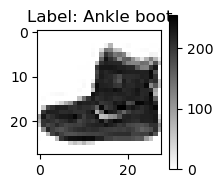

In [3]:
# Step 2: Load the Dataset by fetching the Fashion MNIST dataset

print("\n--- Step 2: Load the Dataset ---")
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Define class names for better interpretability and understanding
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(f"Training images shape: {train_images.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")
print(f"Number of classes: {len(class_names)}")
print("\nSample image and label:")
plt.figure(figsize=(2,2))
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.title(f"Label: {class_names[train_labels[0]]}")
plt.colorbar()
plt.grid(False)
plt.show()


--- Step 3: Data Pre-processing ---
Normalized train images shape: (60000, 28, 28, 1)
Normalized test images shape: (10000, 28, 28, 1)
One-hot encoded train labels shape: (60000, 10)
One-hot encoded test labels shape: (10000, 10)

Sample of pre-processed data:


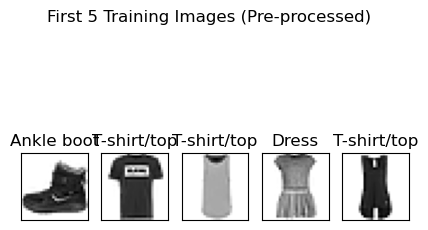

In [5]:
# Step 3: Data Preprocessing by preparing and preprocessing the data.

print("\n--- Step 3: Data Pre-processing ---")

# Normalize pixel values to be between 0 and 1 by dividing by 255.0
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape images for CNN input: (batch, height, width, channels)
# Grayscale images have 1 channel
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Convert labels to one-hot encoding
train_labels_one_hot = keras.utils.to_categorical(train_labels, num_classes=10)
test_labels_one_hot = keras.utils.to_categorical(test_labels, num_classes=10)

print(f"Normalized train images shape: {train_images.shape}")
print(f"Normalized test images shape: {test_images.shape}")
print(f"One-hot encoded train labels shape: {train_labels_one_hot.shape}")
print(f"One-hot encoded test labels shape: {test_labels_one_hot.shape}")

print("\nSample of pre-processed data:")
plt.figure(figsize=(5,5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(train_images[i].reshape(28,28), cmap=plt.cm.binary)
    plt.title(class_names[np.argmax(train_labels_one_hot[i])])
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
plt.suptitle("First 5 Training Images (Pre-processed)", y=0.85)
plt.show()

In [7]:
# Step 4: Create the model by defining the neural network architecture. 

print("\n--- Step 4: Create the Model ---")

model = models.Sequential()
print("Sequential model created.")


--- Step 4: Create the Model ---
Sequential model created.


In [9]:
# Step 5: Add Layers by adding convolutional, pooling, dropout, and dense layers to design the neural network. 

print("\n--- Step 5: Add Layers ---")

# Layer 1: Convolutional Layer
# Filters: 32 feature detectors
# Kernel size: 3x3
# Activation: ReLU (Rectified Linear Unit) for non-linearity
# Input Shape: (28, 28, 1) for the first layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

# Layer 2: Max Pooling Layer
# Pool size: 2x2. Reduces spatial dimensions by half.
model.add(layers.MaxPooling2D((2, 2)))

# Layer 3: Second Convolutional Layer
# Filters: 64, often increasing filters in deeper layers
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Layer 4: Second Max Pooling Layer
model.add(layers.MaxPooling2D((2, 2)))

# Layer 5: Flatten Layer
# Flattens the 2D output of the convolutional/pooling layers into a 1D vector
# This is necessary to feed into the dense (fully connected) layers
model.add(layers.Flatten())

# Layer 6: Dense Output Layer
# Units: 10 (one for each class in Fashion MNIST)
# Activation: Softmax for multi-class classification, outputs probabilities for each class
model.add(layers.Dense(10, activation='softmax'))

print("CNN model architecture defined with 6 layers.")
model.summary()


--- Step 5: Add Layers ---


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


CNN model architecture defined with 6 layers.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)


--- Step 6: Compile and Train the Model ---
Model compiled. Training...
Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 109s 29ms/step - accuracy: 0.7537 - loss: 0.6904 - val_accuracy: 0.8723 - val_loss: 0.3684
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 51s 30ms/step - accuracy: 0.8771 - loss: 0.3419 - val_accuracy: 0.8850 - val_loss: 0.3151
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 51s 30ms/step - accuracy: 0.8920 - loss: 0.3008 - val_accuracy: 0.8933 - val_loss: 0.2983
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 54s 32ms/step - accuracy: 0.9047 - loss: 0.2617 - val_accuracy: 0.8952 - val_loss: 0.2900
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 54s 32ms/step - accuracy: 0.9122 - loss: 0.2409 - val_accuracy: 0.8955 - val_loss: 0.2822
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 80s 31ms/step - accuracy: 0.9207 - loss: 0.2223 - val_accuracy: 0.9048 - val_loss: 0.2711
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 51s 30ms/step - accuracy: 0.9269 - loss: 0.2018 - val_accuracy: 0.9057 - val_loss: 0.2648
Ep

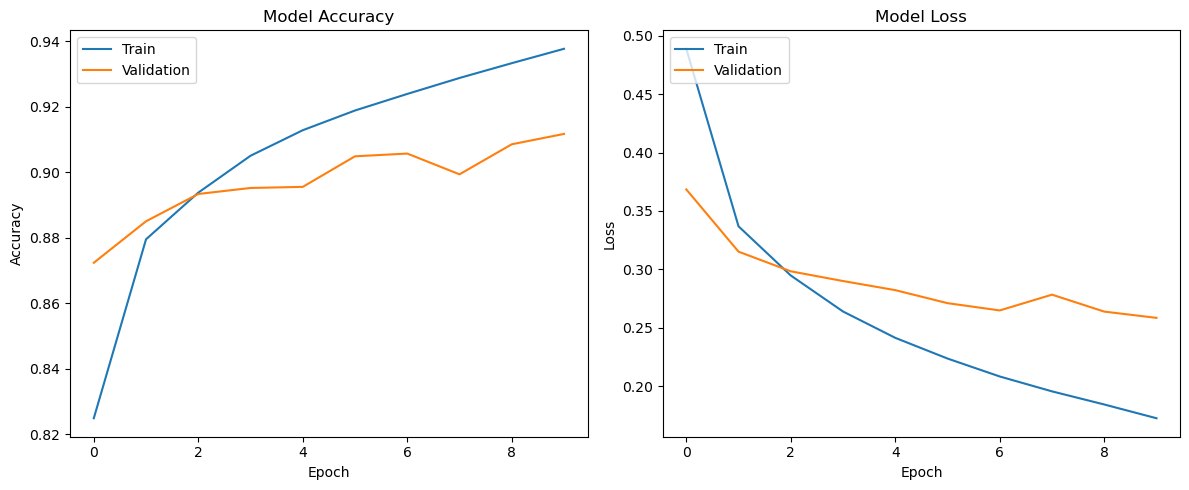

In [11]:
# Step 6: Compile and Train the Model by configuring the model, compiling it and training it using the dataset.

print("\n--- Step 6: Compile and Train the Model ---")

# Compile the model
# Optimizer: Adam is an efficient stochastic optimization algorithm.
# Loss function: Categorical Cross-entropy for multi-class classification with one-hot encoded labels.
# Metrics: Accuracy to evaluate the model's performance.
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("Model compiled. Training...")

# Train the model
# epochs: Number of times the model will iterate over the entire training dataset.
# batch_size: Number of samples per gradient update. (Default is often 32, but can be specified)
# validation_split: A portion of the training data to be used as validation data.
history = model.fit(train_images, train_labels_one_hot, epochs=10, validation_split=0.1)

print("\nModel training complete.")

# Evaluate the model on the test data
print("\n--- Evaluating Model on Test Data ---")
test_loss, test_acc = model.evaluate(test_images, test_labels_one_hot, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# Explainaing the test Accuracy and Test Loss graphs which are labelled, "Model Accuracy" and "Model Loss".

# 1. Model Accuracy Graph
# This graph shows the classification accuracy of the CNN (Convolutional Neural Network) model over each training epoch.
# Blue Line (Train): Represents the accuracy of the model on the training dataset (the data it learns from).
# Orange Line (Validation): Represents the accuracy of the model on a validation dataset (a small portion of the training data that the model has not 
# explicitly seen during training, used to monitor its performance on unseen data).

# How to interpret it:
# Increasing Accuracy: You want to see both lines increasing over epochs, indicating that the model is learning to correctly classify images.
# Convergence: Ideally, both training and validation accuracy should increase and then eventually plateau, indicating that the model has learned as 
# much as it can from the data.

# 2. Model Loss Graph
# This graph shows the value of the loss function (in your case, categorical_crossentropy) over each training epoch. The loss function quantifies how 
# "wrong" the model's predictions are.

# How to interprete it:
# Decreasing Loss: You want to see both lines decreasing over epochs, indicating that the model is becoming better at making correct predictions 
# (i.e., the error is reducing).
# Convergence: Similar to accuracy, both training and validation loss should ideally decrease and then plateau, showing the model has minimized its error.

# Based on the observation that both accuracy lines were going up and both loss lines were going down, with validation metrics following training 
# metrics closely, it strongly suggests that the model is effective.

# This combination of positive trends (increasing accuracy, decreasing loss, and good generalization to the validation set) is the ideal scenario for 
# a well-performing deep learning model. It indicates that the CNN is effectively learning to differentiate between the different clothing categories 
# in the Fashion MNIST dataset.



--- Making Predictions ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


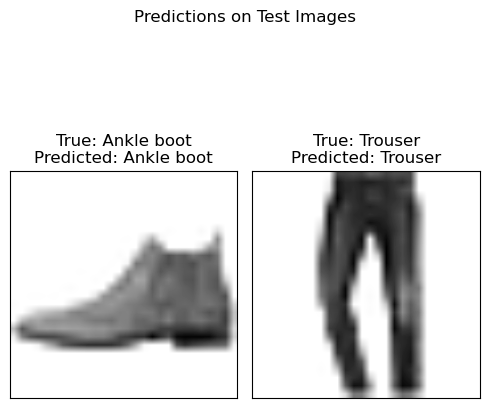


Predictions complete for selected test images.


In [33]:
# Making Predictions for at least 2 images from the Fashion MNIST dataset.

print("\n--- Making Predictions ---")

# Select at least two images from the test set for prediction
# Let's pick images at index 0 and 5 from the test set
image_indices = [0, 5]

plt.figure(figsize=(5,5))

for i, img_idx in enumerate(image_indices):
    # Get the image and its true label
    img = test_images[img_idx]
    true_label = test_labels[img_idx]

    # Model expects a batch of images, so add a dimension
    img_batch = np.expand_dims(img, axis=0)

    # Make a prediction
    predictions = model.predict(img_batch)
    predicted_label = np.argmax(predictions[0]) # Get the class with the highest probability

    # Plot the image and prediction
    plt.subplot(1, len(image_indices), i + 1)
    plt.imshow(img.reshape(28, 28), cmap=plt.cm.binary, interpolation='bilinear')
    plt.title(f"True: {class_names[true_label]}\nPredicted: {class_names[predicted_label]}")
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

plt.suptitle("Predictions on Test Images", y=1.02)
plt.tight_layout()
plt.show()

print("\nPredictions complete for selected test images.")

